# Постановка задачи

Есть некоторая некоммерческая организация (например клуб поэтов, или протестанская церковь или общество философов современности), которая снимает помещение для еженедельных встреч. Бюджет на оплату аренды собирается добровольно, ежемесячно, с постоянных участников организации. При этом количество участников растет, так как есть друзья, знакомые, которые приходят и кто-то отается. Организации необходимо соблюдать баланс между бюджетом аренды и количеством свободных мест для гостей. То есть свободных мест должно быть достаточно много, что бы было комфортно гостю, который приходит в первый раз и в том же время не слишком много, так как каждый квадратный метр арендуемой площади должны оплачивать постоянные участники

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("data.csv")

# переименую ка столбцы
data.rename(columns = {'Отметка времени':'date-time', 'Количество людей в зале (вместе с мамами в детской, исключая детей 0 - 3 лет)':'all','Количество членов церкви в зале':'members'}, inplace = True )

data

,date-time,all,members
0,24.10.2021 10:40:16,65,NaN
1,31.10.2021 12:17:21,73,NaN
2,14.11.2021 12:14:51,70,NaN
3,28.11.2021 13:04:27,58,NaN
4,05.12.2021 12:05:35,58,NaN
...,...,...,...
69,14.05.2023 12:32:10,61,39.0
70,22.05.2023 8:28:20,64,51.0
71,28.05.2023 18:33:37,78,49.0
72,04.06.2023 17:22:17,73,43.0


## План исследования

### Статистика по прошедшему периоду
- ящик с усами, медиана, мода и прочее за весь период
- ящик с усами, медиана, мода и прочее за по сезонам
- ящик с усами, медиана, мода и прочее за по месяцам
- прирост за период по общему количеству и сравнить с приростом по количеству НБЦ

### Прогнозирование

# Cтатистика по прошедшему периода

## ящик с усами, медиана, мода и прочее за весь период

In [2]:
data.describe()

,all,members
count,74.000000,37.000000
mean,73.081081,44.189189
std,14.664986,8.061699
min,37.000000,24.000000
25%,65.000000,39.000000
50%,71.500000,44.000000
75%,79.750000,48.000000
max,140.000000,63.000000


In [3]:
# data_all_people = data[['date-time', 'all']]

<Axes: ylabel='all'>

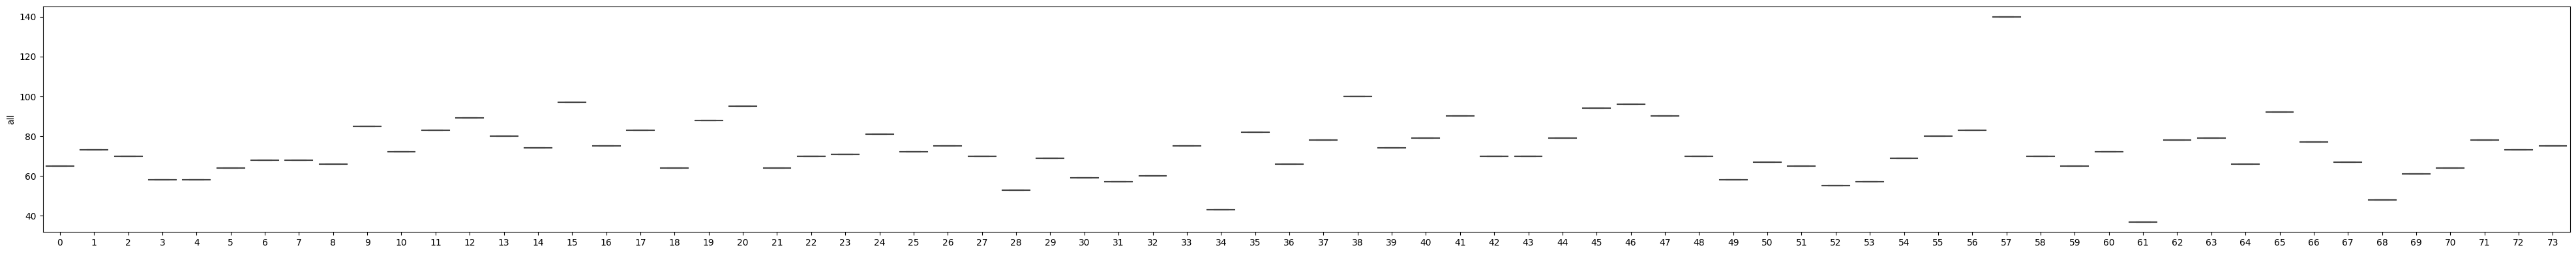

In [4]:
fig = plt.figure()
ax = fig.add_subplot()

fig.canvas.header_visible = True

fig.set_figheight(4.5)
fig.set_figwidth(50)

sns.boxplot(x=data.index, y=data['all'])

### Ящик с усами

<Axes: xlabel='all'>

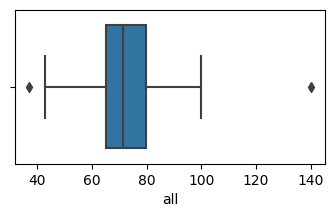

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_figheight(2)
fig.set_figwidth(4)
sns.boxplot(x=data["all"])

### Надо выкинуть выбросы (менее 45 и более 100 человек) и посмотреть тренд

In [6]:
data_all_people__without_ejection = data[(data['all'] > 45)&(data['all'] < 100)]

In [7]:
data_all_people__without_ejection

,date-time,all,members
0,24.10.2021 10:40:16,65,NaN
1,31.10.2021 12:17:21,73,NaN
2,14.11.2021 12:14:51,70,NaN
3,28.11.2021 13:04:27,58,NaN
4,05.12.2021 12:05:35,58,NaN
...,...,...,...
69,14.05.2023 12:32:10,61,39.0
70,22.05.2023 8:28:20,64,51.0
71,28.05.2023 18:33:37,78,49.0
72,04.06.2023 17:22:17,73,43.0


<Axes: xlabel='all'>

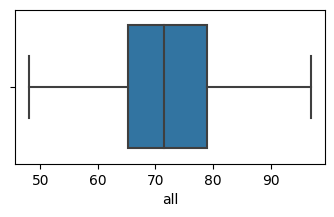

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_figheight(2)
fig.set_figwidth(4)
sns.boxplot(x=data_all_people__without_ejection["all"])

In [9]:
data_all_people__without_ejection.describe()

,all,members
count,70.000000,35.000000
mean,72.685714,44.714286
std,10.953846,7.594779
min,48.000000,24.000000
25%,65.250000,39.000000
50%,71.500000,44.000000
75%,79.000000,48.500000
max,97.000000,63.000000


           8             7             6             5           4
1.744e-10 x - 5.413e-08 x + 6.901e-06 x - 0.0004642 x + 0.01756 x
           3         2
 - 0.3663 x + 3.789 x - 14.35 x + 76.02
            4            3          2
-1.172e-05 x + 0.001861 x - 0.1001 x + 2.007 x + 62.89
 
-0.01822 x + 73.34


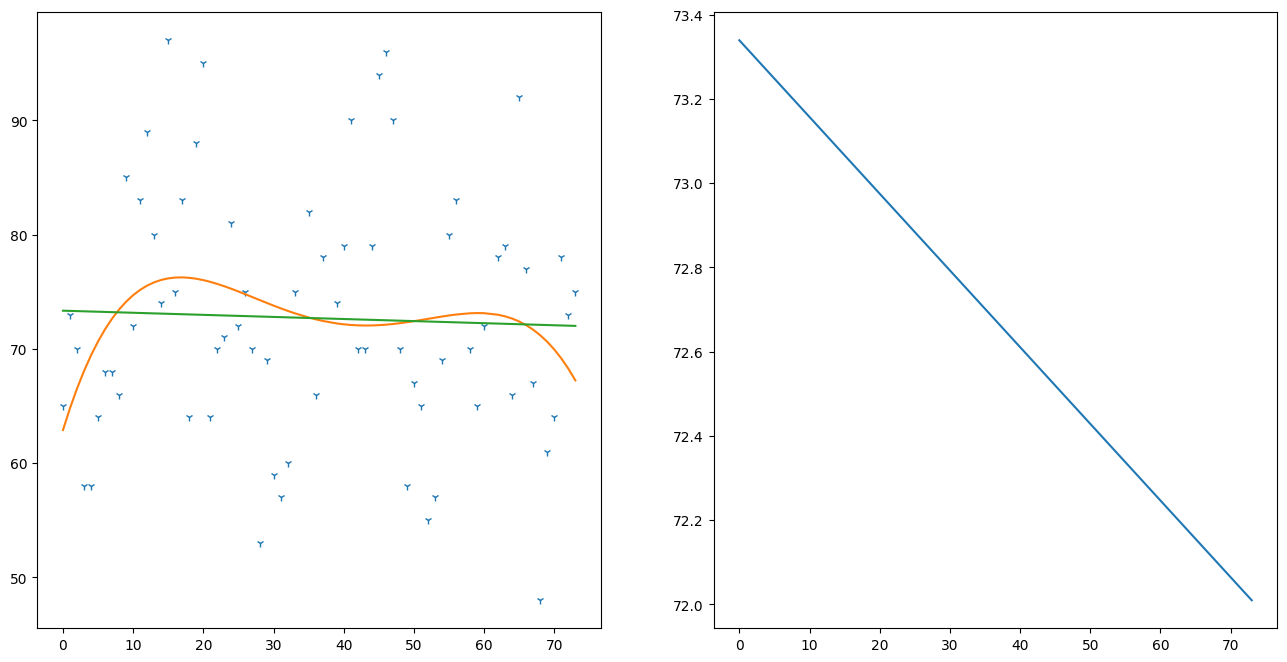

In [10]:
# -- ПОДГОТОВКА ХОЛСТА MATPLOTLIB ---

# задаю сетку из двух частей расположенных  горизонталь
gridsize = (1, 2)

# создаю объект холста для графиков размером 16 на 8 (это в полный экран на маке
fig = plt.figure(figsize=(16,8))

# создаю объекты - сетки осей для рисования грфиков с ссоттвествующим расположением на сетке холста
ax = plt.subplot2grid(gridsize, (0,0))
ax1 = plt.subplot2grid(gridsize, (0,1))

x = data_all_people__without_ejection.index
y = data_all_people__without_ejection['all']

# подбор апрокимирующего полинома высокого порядка
t8 = np.polyfit(x, y, 8)
f8 = np.poly1d(t8)
print(f8)

# подбор апрокимирующего полинома среднего порядка
t4 = np.polyfit(x, y, 4)
f4 = np.poly1d(t4)
print(f4)

# подбор апрокимирующего полинома первого порядка
t1 = np.polyfit(x, y, 1)
f1 = np.poly1d(t1)
print(f1)

# на заданных полотнах нарисую матплотлибом графики
# на первом графике размещу исходные точки и оба графика
# по ключю '1' matplotlib точки отрисовывает трехлучевыми звездочками
ax.plot(x, y, '1', x, f4(x), x, f1(x))
#  второй график - это полном низкой степени
ax1.plot(x, f1(x))

# показываю окно с холстом matplotlib с нарисованными графиками
plt.show()

### Посмотрю как как обстоит дело по месяцам

In [11]:
# Сначала надо собрать кучками по месяцам


In [12]:
data_all_people__without_ejection[['date-time','all']]

,date-time,all
0,24.10.2021 10:40:16,65
1,31.10.2021 12:17:21,73
2,14.11.2021 12:14:51,70
3,28.11.2021 13:04:27,58
4,05.12.2021 12:05:35,58
...,...,...
69,14.05.2023 12:32:10,61
70,22.05.2023 8:28:20,64
71,28.05.2023 18:33:37,78
72,04.06.2023 17:22:17,73


In [13]:
## Привести столбец с датой в формат даты для использования встроенных методов

#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

#data_all_people__without_ejection['date-time'] = pd.to_datetime(data_all_people__without_ejection['date-time'], dayfirst=True, format=' %d%m%Y %H:%M:%S ')

data_all_people__without_ejection['date-time'] = pd.to_datetime(data_all_people__without_ejection['date-time'], format='%d.%m.%Y %H:%M:%S')

#data_all_people__without_ejection['date-time'].astype('datetime64[ns]')

In [14]:
data_all_people__without_ejection['date-time']

0    2021-10-24 10:40:16
1    2021-10-31 12:17:21
2    2021-11-14 12:14:51
3    2021-11-28 13:04:27
4    2021-12-05 12:05:35
             ...        
69   2023-05-14 12:32:10
70   2023-05-22 08:28:20
71   2023-05-28 18:33:37
72   2023-06-04 17:22:17
73   2023-06-11 16:31:56
Name: date-time, Length: 70, dtype: datetime64[ns]

In [15]:
data_all_people__without_ejection['date-time'].dt.to_period("M")

0     2021-10
1     2021-10
2     2021-11
3     2021-11
4     2021-12
       ...   
69    2023-05
70    2023-05
71    2023-05
72    2023-06
73    2023-06
Name: date-time, Length: 70, dtype: period[M]

In [16]:
data_all_people__without_ejection['date_YM'] = data_all_people__without_ejection['date-time'].dt.to_period("M")

In [17]:
data_all_people__without_ejection

,date-time,all,members,date_YM
0,2021-10-24 10:40:16,65,NaN,2021-10
1,2021-10-31 12:17:21,73,NaN,2021-10
2,2021-11-14 12:14:51,70,NaN,2021-11
3,2021-11-28 13:04:27,58,NaN,2021-11
4,2021-12-05 12:05:35,58,NaN,2021-12
...,...,...,...,...
69,2023-05-14 12:32:10,61,39.0,2023-05
70,2023-05-22 08:28:20,64,51.0,2023-05
71,2023-05-28 18:33:37,78,49.0,2023-05
72,2023-06-04 17:22:17,73,43.0,2023-06


In [25]:
#data_all_people__without_ejection.groupby(['date_YM'])['all'].apply(pd.Series.mode)

agg_funce_math = {
    'all': [ 'count', 'mean', 'median', pd.Series.mode ]
}
data_all_people__without_ejection.groupby(['date_YM']).agg(agg_funce_math)

ValueError: Must produce aggregated value

### И как дело по кварталам

# Можно тут же сделать и прогноз

Сейчас есть наблюдения по 73 неделям, то есть примерно полтора года. Пусть наш прогноз будет так же на полтора года еще, то есть еще на 75 пунктов.

In [ ]:
from scipy.optimize import curve_fit 

def mapping_sin(x, a, b, c, d):
    return a * x * x * np.sin(b * x * x + c) + d

args, _  = curve_fit(mapping_sin, x, y) 
a, b, c, d = args[0], args[1], args[2], args[3] 
y_fit_sin = a * x * x * np.sin(b * x * x + c) + d

In [ ]:
# -- ПОДГОТОВКА ХОЛСТА MATPLOTLIB ---

# задаю сетку из двух частей расположенных  горизонталь
gridsize = (1, 2)

# создаю объект холста для графиков размером 16 на 8 (это в полный экран на маке
fig = plt.figure(figsize=(16,8))

# создаю объекты - сетки осей для рисования грфиков с ссоттвествующим расположением на сетке холста
ax = plt.subplot2grid(gridsize, (0,0))
ax1 = plt.subplot2grid(gridsize, (0,1))

# на заданных полотнах нарисую матплотлибом графики
# на первом графике размещу исходные точки и оба графика
# по ключю '1' matplotlib точки отрисовывает трехлучевыми звездочками
#  второй график - это полном низкой степени
ax.plot(x, y, '1', x, f4(x), x, y_fit_sin)

#ax.plot(x_predict, f8(x_predict))

ax1.plot(x, y_fit_sin)

# показываю окно с холстом matplotlib с нарисованными графиками
plt.show()

In [ ]:
x_predict = [i for i in range(74,150)]
x_long = np.concatenate((x, x_predict))

y_fit_sin_long = a * x_long * x_long * np.sin(b * x_long * x_long + c) + d

In [ ]:
# -- ПОДГОТОВКА ХОЛСТА MATPLOTLIB ---

# задаю сетку из двух частей расположенных  горизонталь
gridsize = (1, 2)

# создаю объект холста для графиков размером 16 на 8 (это в полный экран на маке
fig = plt.figure(figsize=(16,8))

# создаю объекты - сетки осей для рисования грфиков с ссоттвествующим расположением на сетке холста
ax = plt.subplot2grid(gridsize, (0,0))
ax1 = plt.subplot2grid(gridsize, (0,1))

# на заданных полотнах нарисую матплотлибом графики
# на первом графике размещу исходные точки и оба графика
# по ключю '1' matplotlib точки отрисовывает трехлучевыми звездочками
#  второй график - это полном низкой степени
ax.plot(x, y, '1', x_long, y_fit_sin_long)

#ax.plot(x_predict, f8(x_predict))

#ax1.plot(x, y_fit_sin)

# показываю окно с холстом matplotlib с нарисованными графиками
plt.show()